### 3D U-Net Implementation
1. [Paper](https://arxiv.org/pdf/1606.06650.pdf)
2. [Implementation](https://github.com/wolny/pytorch-3dunet)

**3D U-Net deals with Biomedical "Volumetric" Data.**

**0. Contributions**
- Annotates some slices in the volume to be segmented.
- Dense segmentation even when trained with datasets that sparsely annotated training set exists.
- 3D counterpart implementatioin of 2D U-Net
- Elastic deformations for efficient data augmentation during training

**1. Related Works**
- 3D CNN Hough Voting Approach [Milletari et al.](https://www.researchgate.net/publication/336312306_Hough-CNN_Deep_Learning_for_Segmentation_of_Deep_Brain_Regions_in_MRI_and_Ultrasound)
    - Weakness : Not E2E
- 3D CNN E2E approach for 3D segmentation [Kleesiek et al.](https://pubmed.ncbi.nlm.nih.gov/26808333/)
    - Weakness : Not deep enough, only one pooling layer after first convolution >> multiple scale image segmentation is unavailable.
    
**2. Architecture and Details**
- Architecture
    - 3D version of 2D U-Net
    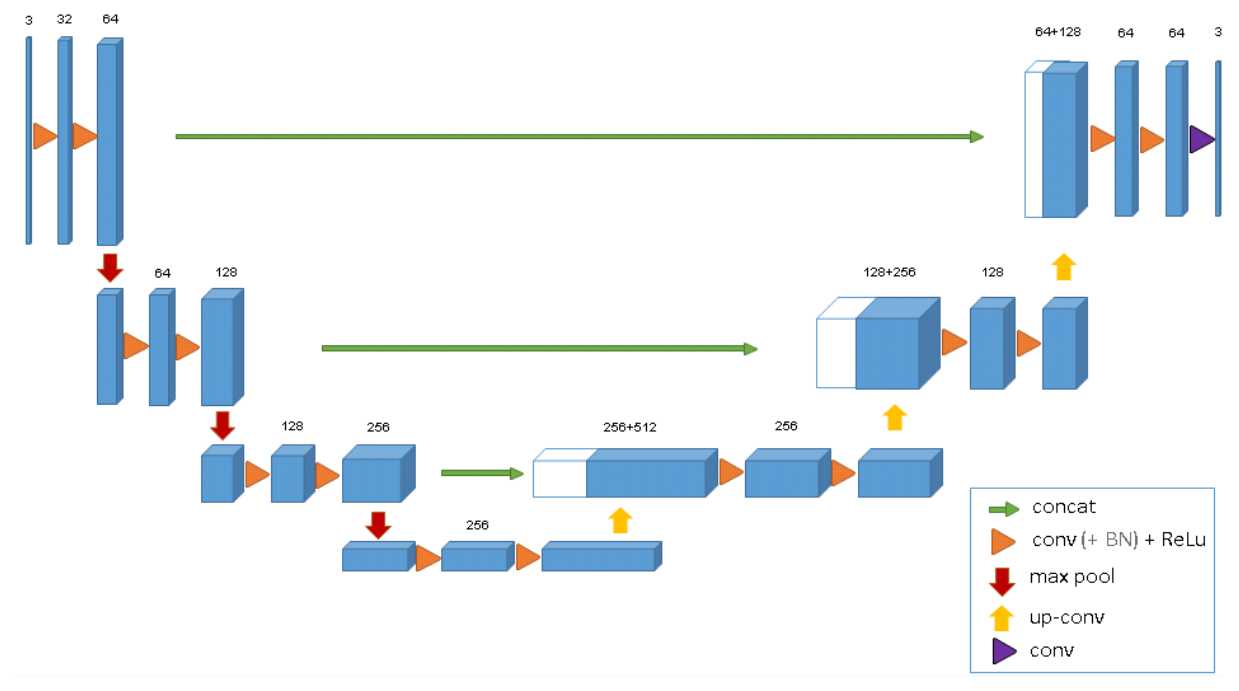
- Details
    - Inception v2 for bottleneck problem
    - BatchNorm for faster convergence
    - Elastic Deformation for data augmentation


### Implementation of various data augmentation methods

```python
# Reference: https://github.com/wolny/pytorch-3dunet/blob/master/pytorch3dunet/augment/transforms.py
import importlib
import random

import numpy as np
import torch
from scipy.ndimage import rotate, map_coordinates, gaussian_filter, convolve
from skimage import measure
from skimage.filters import gaussian
from skimage.segmentation import find_boundaries
```

**Define Compose Class**
``` python
GLOBAL_RANDOM_STATE = np.random.RandomState(47) # Code reproducibility when random augmentation
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, m): # call magic method, when this class is called -> this method will be executed.
        for t in self.transforms:
            m = t(m)
        return m
```

### Implementation of 3D U-Net

In [ ]:
# Reference: https://github.com/wolny/pytorch-3dunet/tree/master/pytorch3dunet/unet3d